In [25]:
# https://www.youtube.com/watch?v=lB_5pC1MkGg
import math
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("ggplot")
%matplotlib inline

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

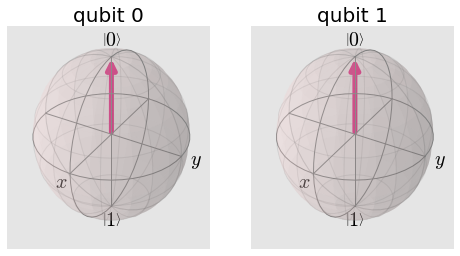

In [12]:
circuit = q.QuantumCircuit(2,2)

# currently: 0, 0
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

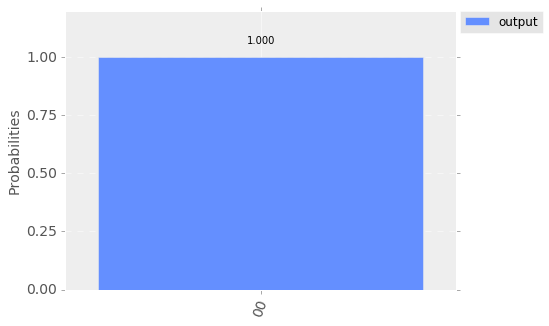

In [14]:
plot_histogram([counts], legend=["output"])

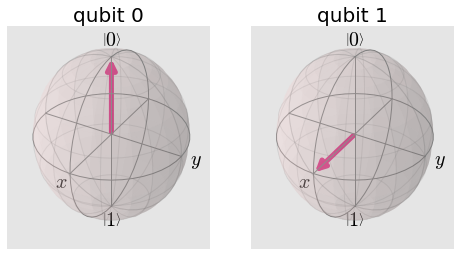

In [15]:
circuit = q.QuantumCircuit(2,2)

# 0, 0
circuit.h(1)
# 0, 1 | 0, 0

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

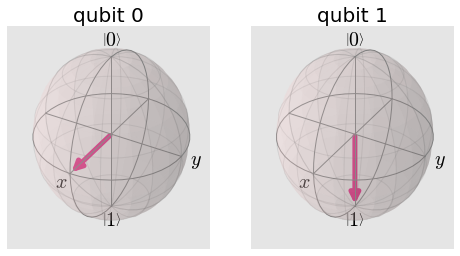

In [16]:
circuit = q.QuantumCircuit(2,2)

# 0, 0
circuit.h(0)
# 0, 0 | 1, 0
circuit.x(1)
# 0, 1 | 1, 1

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

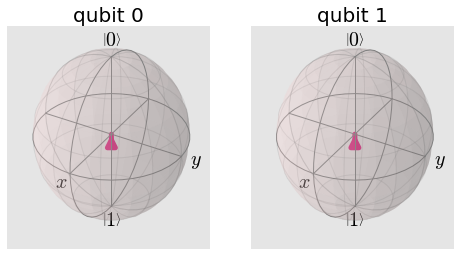

In [17]:
circuit = q.QuantumCircuit(2,2)

# 0, 0
circuit.h(0)
# 0, 0 | 1, 0
circuit.cx(0, 1)
# 0, 0 | 1, 1

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

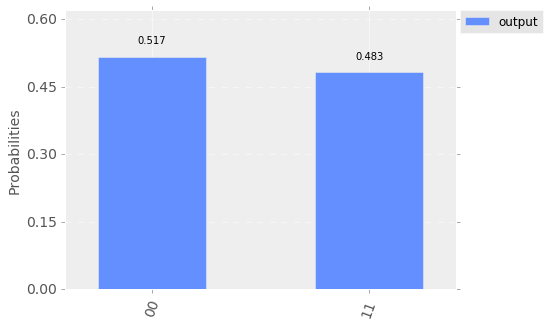

In [18]:
plot_histogram([counts], legend=["output"])

In [19]:
circuit = q.QuantumCircuit(3, 3)

# 0, 0
circuit.h(0)
# 0, 0, 0 | 1, 0, 0
circuit.h(1)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0
circuit.ccx(0, 1, 2) # controlled controlled not. If 1st and 2nd qubits are 1, flips 3rd qubit.
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 1

circuit.draw()

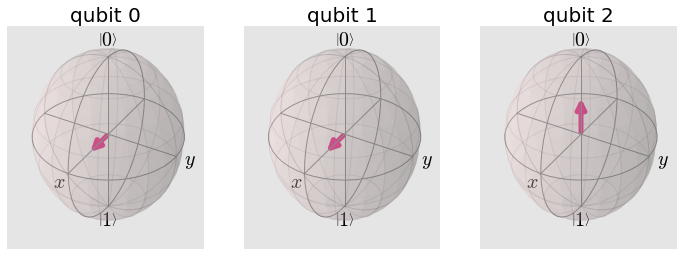

In [20]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

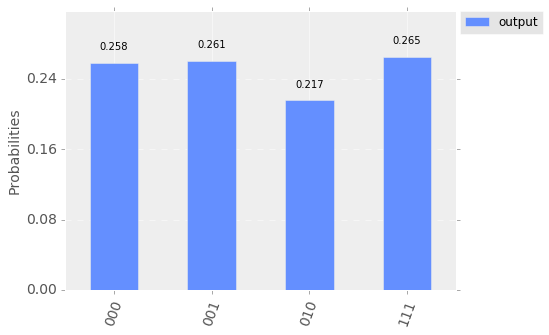

In [22]:
plot_histogram([counts], legend=["output"])

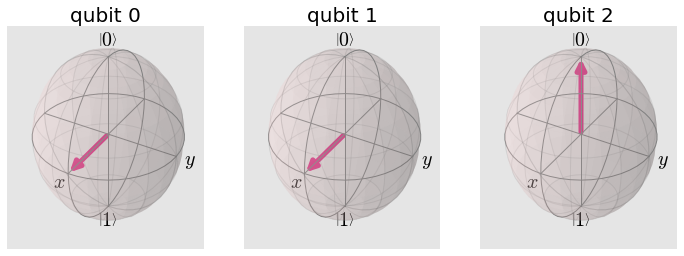

In [23]:
circuit = q.QuantumCircuit(3, 3)

# 0, 0
circuit.h(0)
# 0, 0, 0 | 1, 0, 0
circuit.h(1)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0
circuit.rx(math.pi, 2) # rotate on X. Rotate qubit on x axis by radians.

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

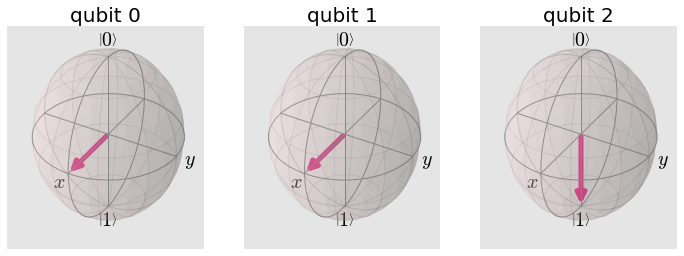

In [27]:
circuit = q.QuantumCircuit(3, 3)

# 0, 0
circuit.h(0)
# 0, 0, 0 | 1, 0, 0
circuit.h(1)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0
circuit.rx(math.pi, 2) # rotate on X. Rotate qubit on x axis by radians. (pi = 180 degrees)
# 0, 0, 1 | 1, 0, 1 | 0, 1, 1 | 1, 1, 1

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

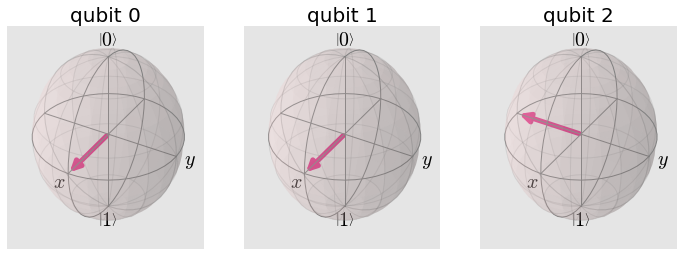

In [28]:
circuit = q.QuantumCircuit(3, 3)

# 0, 0
circuit.h(0)
# 0, 0, 0 | 1, 0, 0
circuit.h(1)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0
circuit.rx(math.pi/2, 2)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0 | 0, 0, 1 | 1, 0, 1 | 0, 1, 1 | 1, 1, 1

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

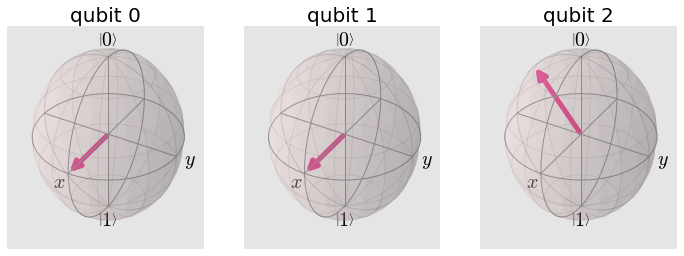

In [29]:
circuit = q.QuantumCircuit(3, 3)

# 0, 0
circuit.h(0)
# 0, 0, 0 | 1, 0, 0
circuit.h(1)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0
circuit.rx(math.pi/4, 2)
# 0, 0, 0 | 1, 0, 0 | 0, 1, 0 | 1, 1, 0 | 0, 0, 1 | 1, 0, 1 | 0, 1, 1 | 1, 1, 1

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

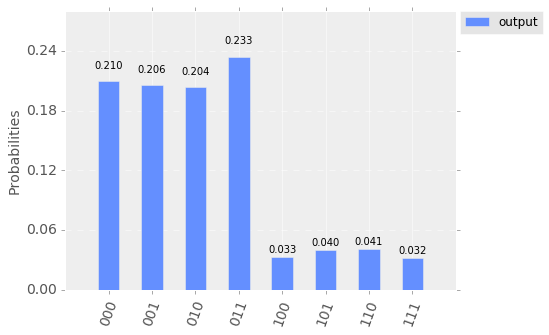

In [30]:
plot_histogram([counts], legend=["output"])

In [31]:
circuit.draw()